In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
plt.ion()

# Prune data
data = pd.read_csv("NYPD_arrests.csv", parse_dates=["ARREST_DATE"])
data = data[["ARREST_DATE", "OFNS_DESC"]]
data = data.dropna(subset=['OFNS_DESC'])
data["YEAR"] = pd.DatetimeIndex(data['ARREST_DATE']).year
data["MONTH"] = pd.DatetimeIndex(data['ARREST_DATE']).month


# Filter data by offense
def get_offence_data(data, offence):
    return data.loc[data['OFNS_DESC'] == offence]

In [2]:
all_month_data = data.groupby(pd.Grouper(key='ARREST_DATE', freq='M')).size()
print(all_month_data["2020-02-29"])

15471


In [3]:
# Get different offense data
data_drugs = get_offence_data(data, 'DANGEROUS DRUGS')
data_robbery = get_offence_data(data, 'ROBBERY')
data_assault = get_offence_data(data, 'ASSAULT 3 & RELATED OFFENSES')
data_felony_assault = get_offence_data(data, 'FELONY ASSAULT')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
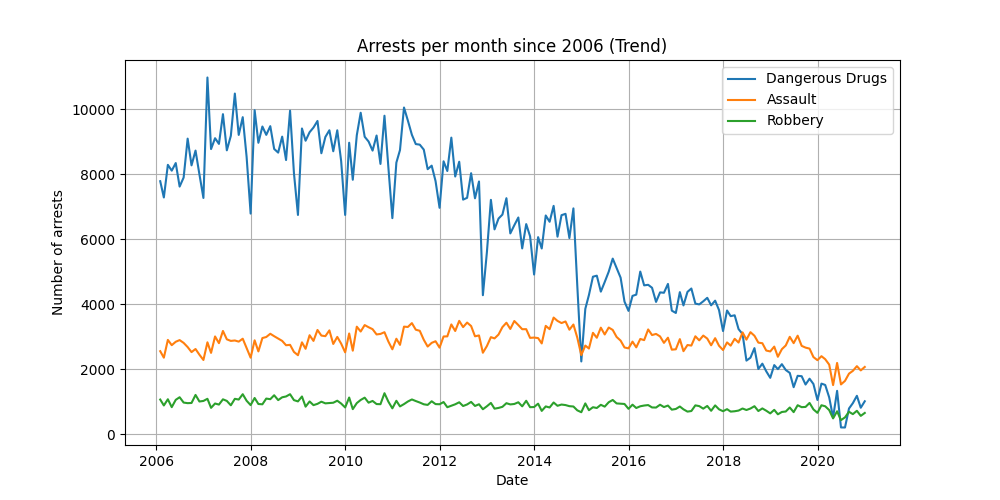

In [4]:
# Show trend for drugs, robbery and assault since 2006
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
for category in [data_drugs, data_assault, data_robbery]:    
    ax.plot(category.groupby(pd.Grouper(key='ARREST_DATE', freq='M')).size())

ax.legend(["Dangerous Drugs", "Assault", "Robbery"])
ax.set(xlabel='Date', ylabel='Number of arrests', title='Arrests per month since 2006 (Trend)')
ax.grid()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
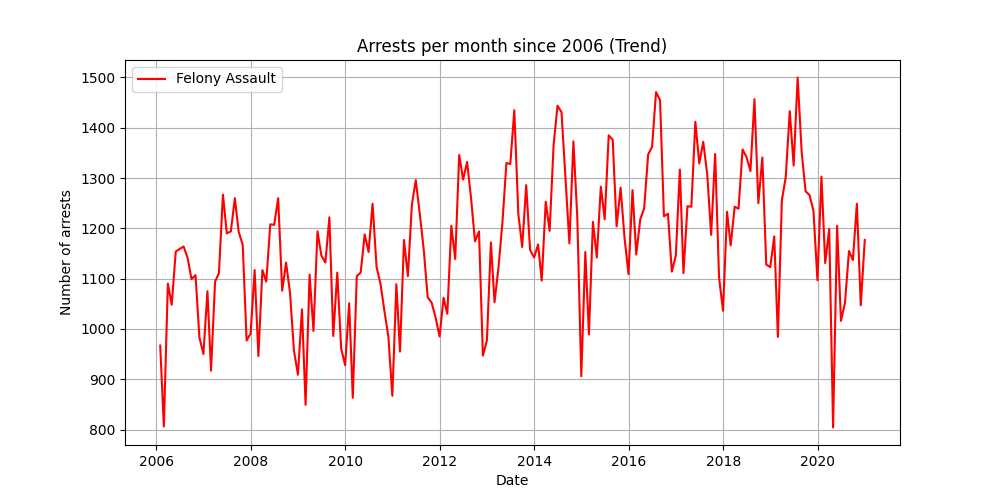

In [5]:
# Show trend for drugs, robbery and assault since 2006
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
for category in [data_felony_assault]:    
    ax.plot(category.groupby(pd.Grouper(key='ARREST_DATE', freq='M')).size(), color="red")

ax.legend(["Felony Assault"])
ax.set(xlabel='Date', ylabel='Number of arrests', title='Arrests per month since 2006 (Trend)')
ax.grid()

plt.show()

In [6]:
def get_normalized_arrests(crime_type):
    normalized_arrests = [0 for i in range(12)]
    total_arrests_per_year = crime_type.groupby(["YEAR"]).size()
    arrests_per_month = crime_type.groupby(["YEAR", "MONTH"]).size()

    # For each year in dataset
    for year in range(2006, 2021):
        for index, arrests in enumerate(arrests_per_month[year]):
            normalized_arrests[index] += arrests / total_arrests_per_year[year]
    
    normalized_shifted = []
    for month in normalized_arrests:
        normalized_shifted.append((month*len(normalized_arrests)/sum(normalized_arrests))*100-100)
        
    return normalized_shifted

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
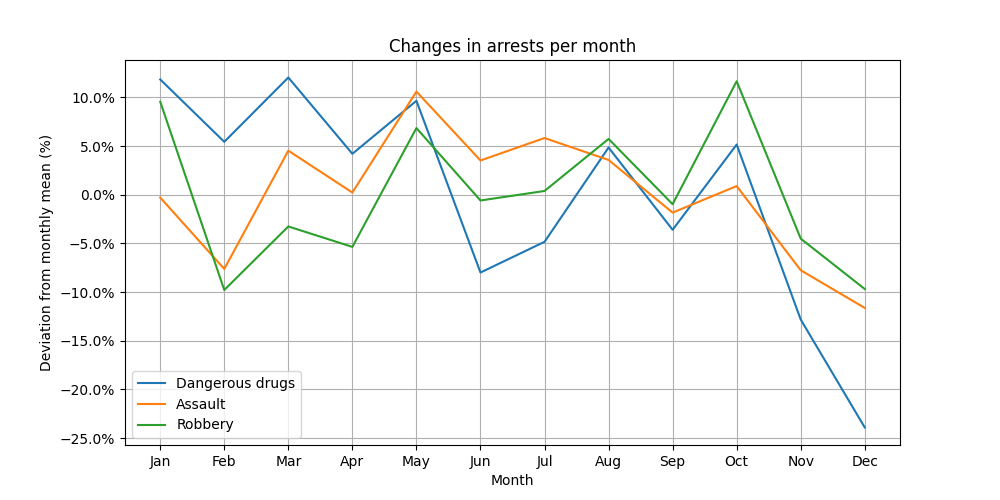

In [7]:
normalized_drugs = get_normalized_arrests(data_drugs)
normalized_assault = get_normalized_arrests(data_assault)
normalized_robbery = get_normalized_arrests(data_robbery)

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
for crime_type in [normalized_drugs, normalized_assault, normalized_robbery]:
    ax.plot(crime_type)

ax.legend(["Dangerous drugs", "Assault", "Robbery"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set(xlabel='Month', ylabel='Deviation from monthly mean (%)', title='Changes in arrests per month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.grid()

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
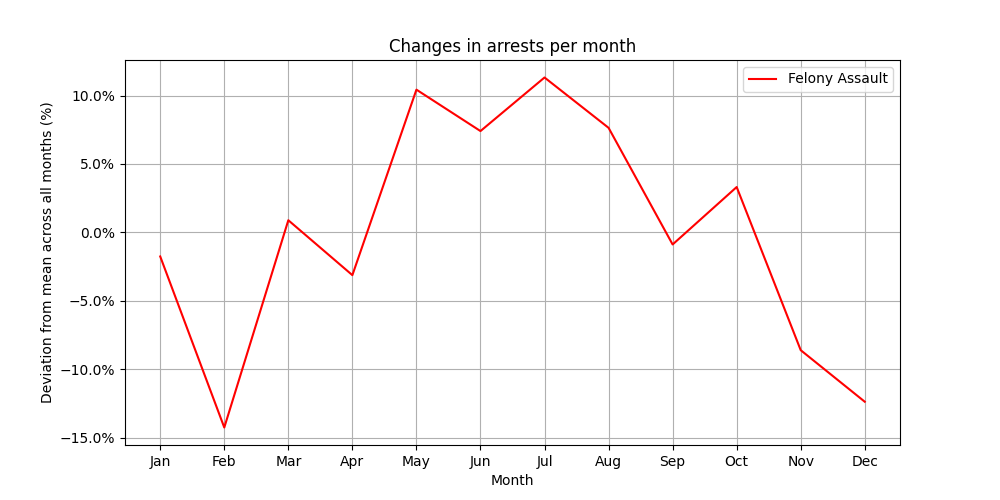

In [8]:
normalized_felony = get_normalized_arrests(data_felony_assault)

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
for crime_type in [normalized_felony]:
    ax.plot(crime_type, color="red")

ax.legend(["Felony Assault"])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set(xlabel='Month', ylabel='Deviation from mean across all months (%)', title='Changes in arrests per month')
ax.set_xticks(np.arange(0,12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.grid()

plt.show()

In [9]:
def get_normalized_arrests_days(crime_type):
    normalized_arrests = [0 for i in range(7)]
    # Array for correcting order
    weekday_translation = [4, 0, 5, 6, 3, 1, 2]
    total_arrests_per_date = crime_type.groupby(["YEAR", "MONTH", crime_type["ARREST_DATE"].dt.day_name()]).size()
    arrests_per_month = crime_type.groupby(["YEAR", "MONTH"]).size()
     # For each year in dataset
    for year in range(2006, 2021):
        for month in range(1, 13):
            # NB! Alphabetical order
            # Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday
            normalized_week = total_arrests_per_date[year][month]/arrests_per_month[year][month]
            for index, day in enumerate(normalized_week):
                normalized_arrests[weekday_translation[index]] += day
                
    normalized_shifted = []
    for month in normalized_arrests:
        normalized_shifted.append((month*len(normalized_arrests)/sum(normalized_arrests))*100-100)
    
    return normalized_shifted

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
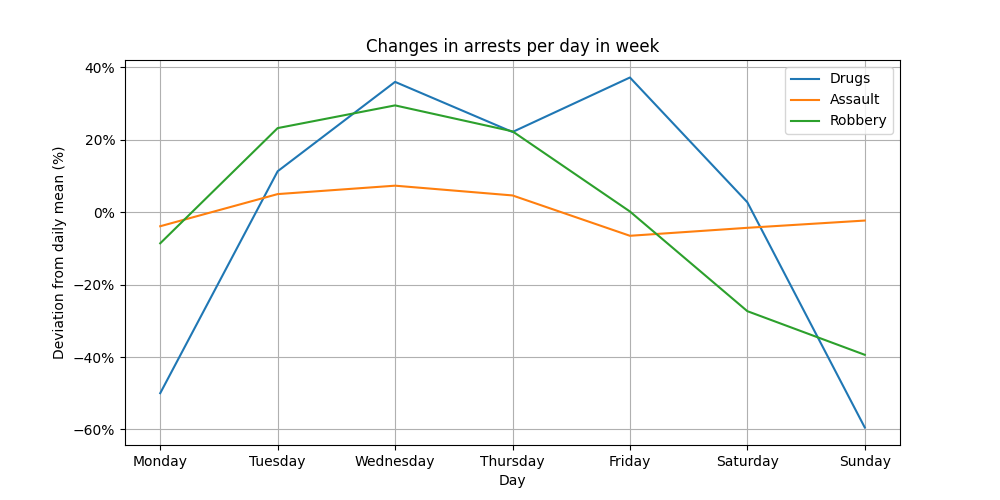

In [10]:
df_days_drugs = [get_normalized_arrests_days(data_type) for data_type in [data_drugs, data_assault, data_robbery]]

fig, ax = plt.subplots()
fig.set_size_inches(10,5)

for data_type in df_days_drugs:
    ax.plot(data_type)

ax.set(xlabel='Day', ylabel='Deviation from daily mean (%)', title='Changes in arrests per day in week')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(np.arange(0,7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.grid()
ax.legend(["Drugs", "Assault", "Robbery"]) #add the column names as legend.

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
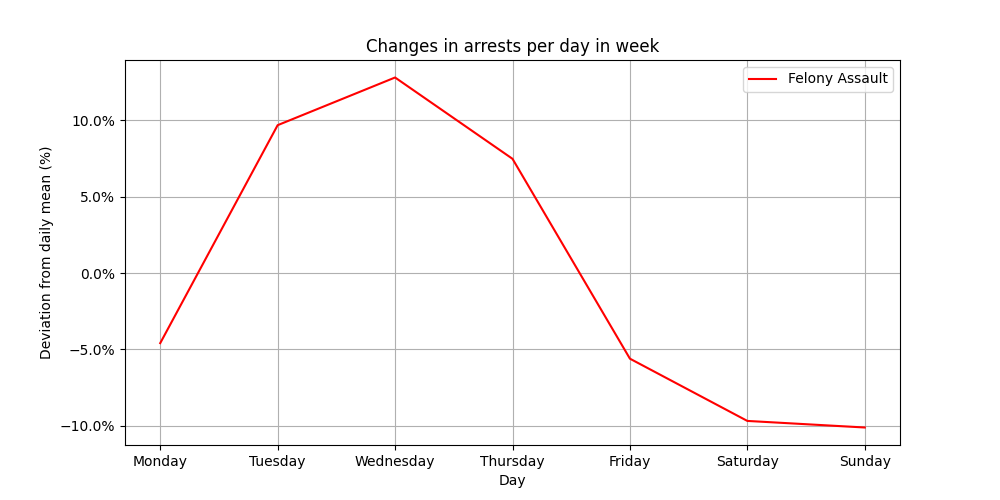

In [11]:
df_days_crimes = [get_normalized_arrests_days(data_type) for data_type in [data_felony_assault]]

fig, ax = plt.subplots()
fig.set_size_inches(10,5)

for data_type in df_days_crimes:
    ax.plot(data_type, color="red")

ax.set(xlabel='Day', ylabel='Deviation from daily mean (%)', title='Changes in arrests per day in week')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(np.arange(0,7))
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) #add monthlabels to the xaxis
ax.grid()
ax.legend(["Felony Assault"]) #add the column names as legend.

plt.show()